# Аналитический проект по зарплатам

Датасет с Data Science зарплатами содержит 11 столбцов, где:

* `work_year` — Год, когда была выплачена зарплата.
* `experience_level` — Уровень опыта работы на данной должности в течение года
* `employment_type` — Тип занятости для данной роли
* `job_title` — Должность, на которой работал сотрудник в течение года.
* `salary` — Общая сумма зарплаты GROSS
* `salary_currency` — Валюта зарплаты в виде кода валюты ISO 4217.
* `salaryinusd` — зарплата в долларах США. Целевая переменная.
* `employee_residence` — Основная страна пребывания сотрудника в течение рабочего года в виде кода страны ISO 3166.
* `remote_ratio` — Общий объем работы, выполняемой удаленно
* `company_location` — Страна, в которой находится главный офис или филиал работодателя.
* `company_size` — Медианное количество человек, работавших в компании в течение года

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None  # полностью отображаем столбцы
warnings.filterwarnings("ignore")  # убирает ошибки библиотек
sns.set_style("whitegrid")  # визуализация

In [2]:
df = pd.read_csv("ds_salaries.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [4]:
df.describe().T  # описательная статистика(числа)

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [5]:
df.describe(include="object").T  # описательная статистика(объекты)

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


## Предобработка данных

In [6]:
df_base = df  # датасет до обработки

### Переформатирование столбцов

Заменим верхний регистр на нижний в названии столбцов.

In [7]:
df.columns = df.columns.str.lower()

df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Проверка на наличие дублей строк

In [8]:
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


In [9]:
 # Удаляем дубликаты, обновляем индексы
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df.isna().sum()  # проверка на наличие пропусков в столбцах

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Визуализация и анализ

a. Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях? - готово

b. Влияет ли удаленная работа на зарплату? Есть ли корреляция?

c. Зависит ли заработная плата от размера предприятия?

d. Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

e. Оцените медианную зарплату для каждой должности.

f. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

g. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

h. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?

### a. Какие самые высокооплачиваемые должности? Есть ли выбросы в заработной плате? В каких должностях?

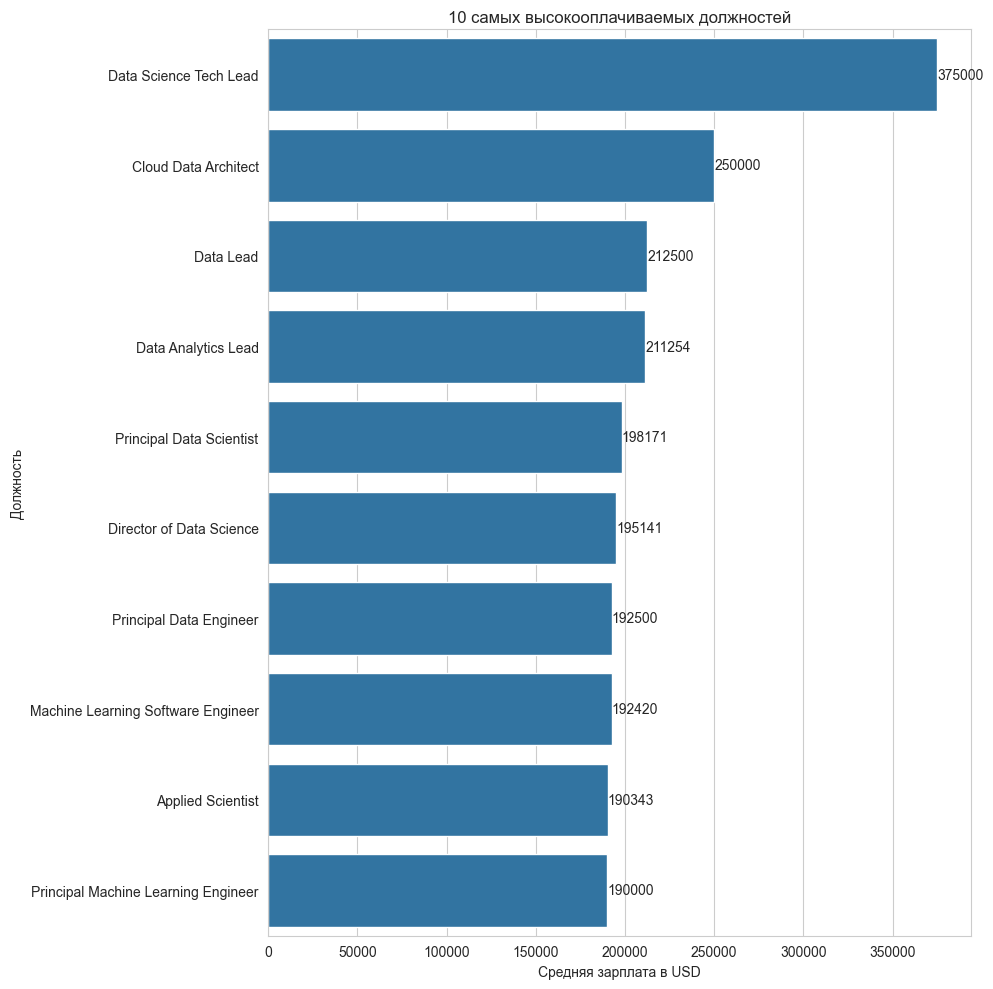

In [11]:
most_salary = (
    df.groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)[:10]
)

plt.figure(figsize=(10, 10))
ax = sns.barplot(
    x=most_salary, y=most_salary.index, orient="h", order=most_salary.index
)
ax.bar_label(ax.containers[0])
plt.title("10 самых высокооплачиваемых должностей")
plt.xlabel("Средняя зарплата в USD")
plt.ylabel("Должность")

plt.tight_layout()
plt.show()

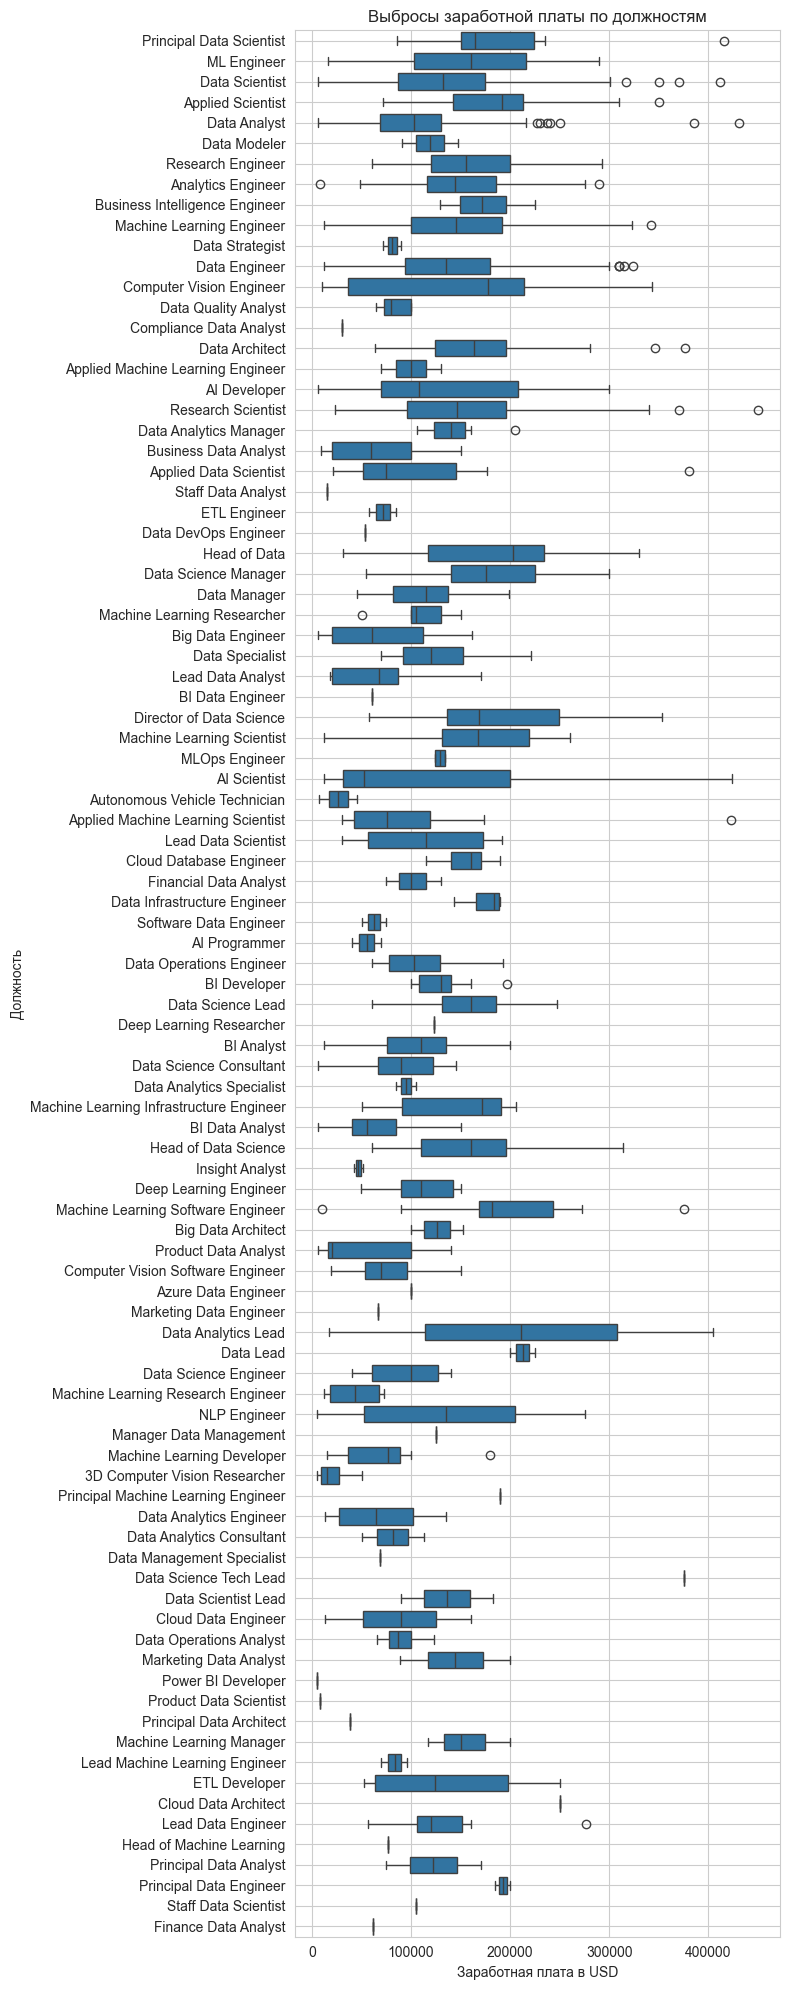

In [12]:
# График выбросов дял каждой должности
plt.figure(figsize=(8, 20))
sns.boxplot(x="salary_in_usd", y="job_title", data=df)
plt.title("Выбросы заработной платы по должностям")
plt.xlabel("Заработная плата в USD")
plt.ylabel("Должность")
plt.grid(axis="y")

plt.tight_layout()
plt.show()


#### Выводы:

Самые высокооплачиваемые должности:

In [13]:
print(*most_salary.index, sep="\n")

Data Science Tech Lead
Cloud Data Architect
Data Lead
Data Analytics Lead
Principal Data Scientist
Director of Data Science
Principal Data Engineer
Machine Learning Software Engineer
Applied Scientist
Principal Machine Learning Engineer


Выбросы по заработной плате наиболее часто встречаются в профессиях:
- Data Scientist, 
- Data Analyst, 
- Machine Learning Engineer, 
- Data Engineer, 
- Data Architect, 
- Research Scientist  

### b. Влияет ли удаленная работа на зарплату? Есть ли корреляция?

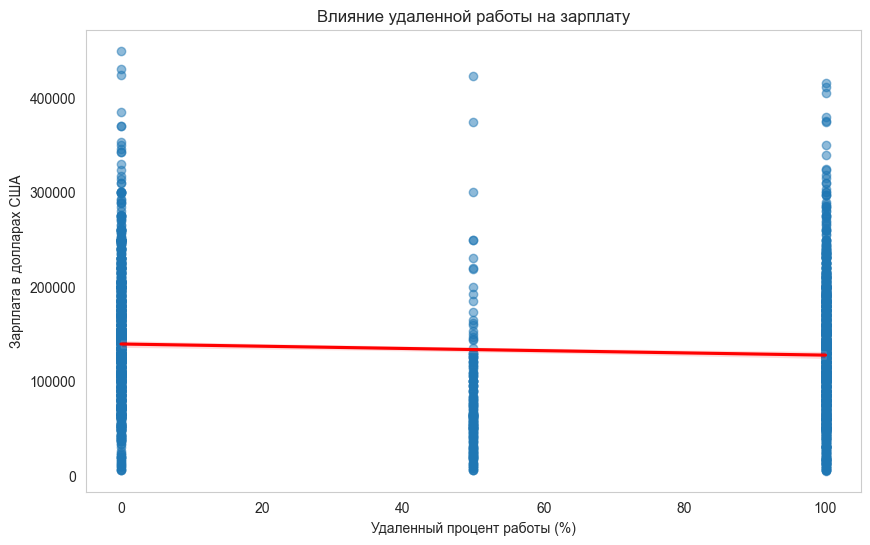

In [14]:
# Регрессивный анализ
plt.figure(figsize=(10, 6))
sns.regplot(
    x="remote_ratio",
    y="salary_in_usd",
    data=df,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"},
)
plt.title("Влияние удаленной работы на зарплату")
plt.xlabel("Удаленный процент работы (%)")
plt.ylabel("Зарплата в долларах США")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Влияние удаленной работы на зарплату')

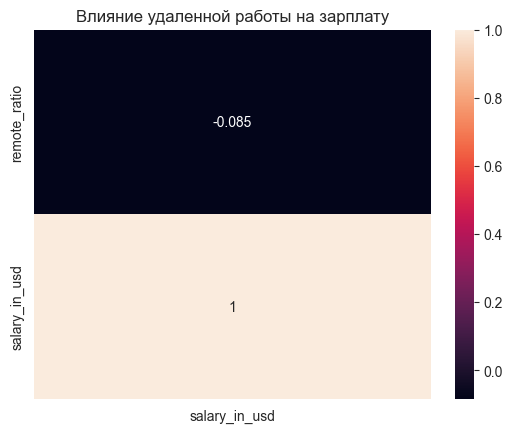

In [15]:
# Тепловая карта
sns.heatmap(df[["remote_ratio", "salary_in_usd"]].corr()[["salary_in_usd"]], annot=True)
plt.title("Влияние удаленной работы на зарплату")

### Выводы:

Из анализа регрессии следует, что уровень зарплаты практически не меняется в зависимости от объема работы, выполненного удаленно.  Корреляционный анализ показывает, что слабая корреляция (-0,085) подтверждает, что удаленная работа не является значимым фактором влияющим на зарплату.

### c. Зависит ли заработная плата от размера предприятия?

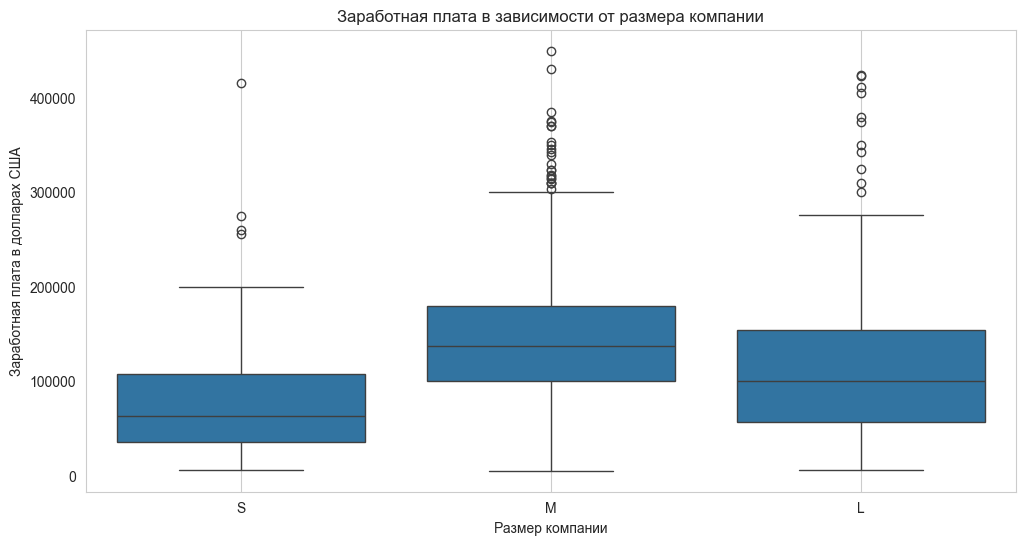

In [16]:
# Визуализация: boxplot

size_order = ["S", "M", "L"]
df["company_size"] = pd.Categorical(
    df["company_size"], categories=size_order, ordered=True
)

plt.figure(figsize=(12, 6))
sns.boxplot(x="company_size", y="salary_in_usd", data=df)
plt.title("Заработная плата в зависимости от размера компании")
plt.xlabel("Размер компании")
plt.ylabel("Заработная плата в долларах США")
plt.grid()

# Показать график
plt.show()

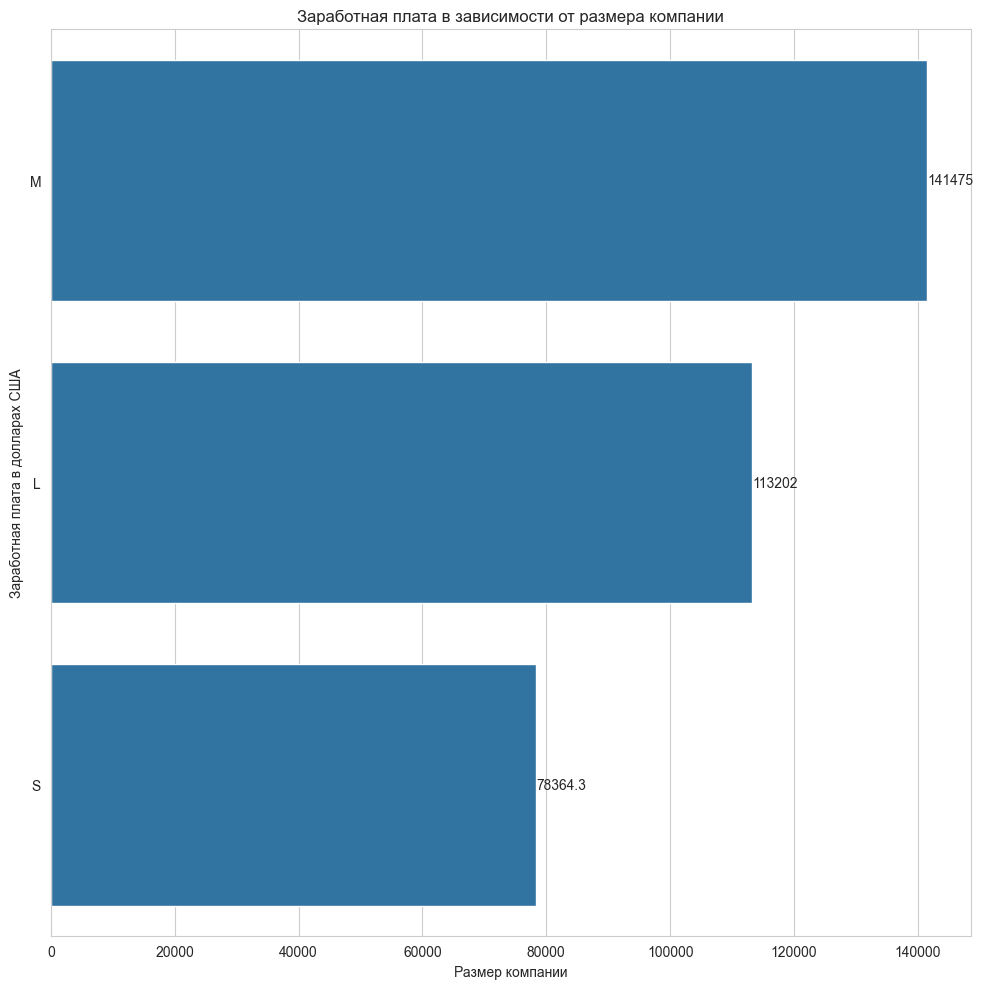

In [17]:
temp = (
    df.groupby(["company_size"])["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)[:10]
)

plt.figure(figsize=(10, 10))
ax = sns.barplot(x=temp, y=temp.index, orient="h", order=temp.index)
ax.bar_label(ax.containers[0])
plt.title("Заработная плата в зависимости от размера компании")
plt.xlabel("Размер компании")
plt.ylabel("Заработная плата в долларах США")

plt.tight_layout()
plt.show()

### Выводы
Анализ показывает, что в компаниях среднего размера (М) уровень заработной планты выше

### d. Какие страны наиболее популярны среди вакансий? В каких заработная плата выше, а в каких ниже?

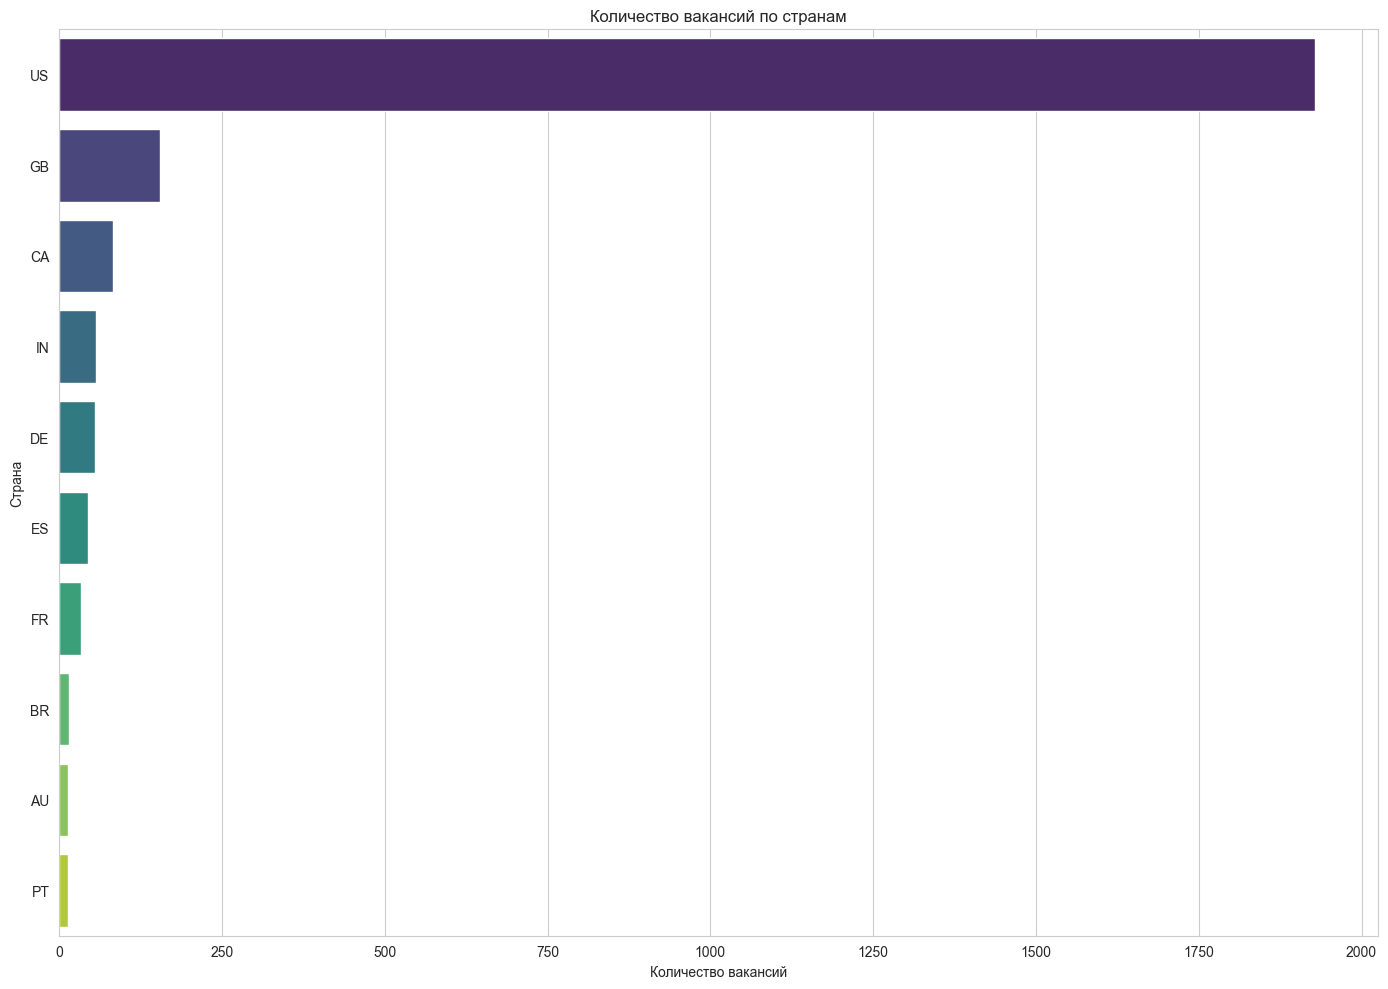

In [18]:
# Подсчет количества вакансий по странам
country_counts = df["company_location"].value_counts().reset_index()
country_counts.columns = ["country", "job_count"]

# Визуализация
plt.figure(figsize=(14, 10))

# График количества вакансий по странам
sns.barplot(
    x="job_count",
    y="country",
    data=country_counts.sort_values("job_count", ascending=False).head(10),
    palette="viridis",
)
plt.title("Количество вакансий по странам")
plt.xlabel("Количество вакансий")
plt.ylabel("Страна")

plt.tight_layout()
plt.show()

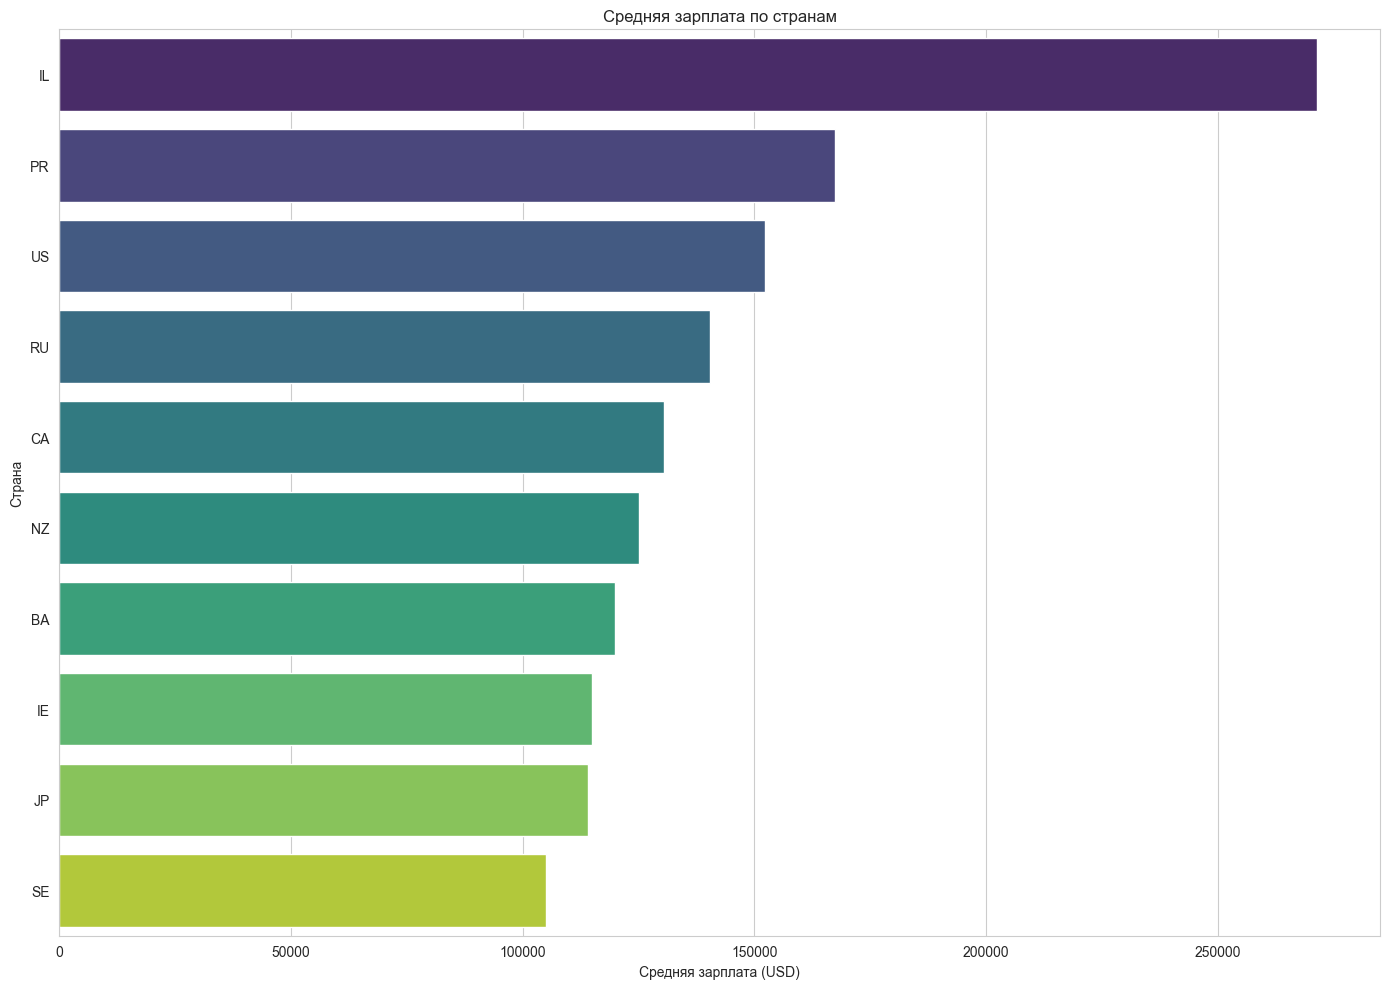

In [19]:
# Подсчет средней зарплаты по странам
average_salary = df.groupby("company_location")["salary_in_usd"].mean().reset_index()
average_salary.columns = ["country", "average_salary"]

# Визуализация
plt.figure(figsize=(14, 10))

# График средней зарплаты по странам
sns.barplot(
    x="average_salary",
    y="country",
    data=average_salary.sort_values("average_salary", ascending=False).head(10),
    palette="viridis",
)
plt.title("Средняя зарплата по странам")
plt.xlabel("Средняя зарплата (USD)")
plt.ylabel("Страна")

plt.tight_layout()
plt.show()

### Выводы:

In [20]:
print("Самые популярны по количеству вакансий страны:")
country_counts.sort_values("job_count", ascending=False).head(10).reset_index()


Самые популярны по количеству вакансий страны:


,index,country,job_count
0,0,US,1929
1,1,GB,155
2,2,CA,83
3,3,IN,57
4,4,DE,55
5,5,ES,44
6,6,FR,33
7,7,BR,15
8,8,AU,14
9,9,PT,14


In [21]:
temp_salary = average_salary.sort_values(
    "average_salary", ascending=False
).reset_index()

print("Средняя заработная плата выше в странах:")
temp_salary.head(10)

Средняя заработная плата выше в странах:


,index,country,average_salary
0,37,IL,271446.500000
1,59,PR,167500.000000
2,70,US,152374.791602
3,62,RU,140333.333333
4,12,CA,130572.759036
5,55,NZ,125000.000000
6,7,BA,120000.000000
7,36,IE,114943.428571
8,42,JP,114127.333333
9,63,SE,105000.000000


In [22]:
print("Страны с самой низкой заработной платой")
temp_salary.tail(10)

Страны с самой низкой заработной платой


,index,country,average_salary
62,57,PK,20000.0
63,68,TR,19058.0
64,29,GH,18500.0
65,48,MD,18000.0
66,66,SK,12608.0
67,71,VN,12000.0
68,1,AL,10000.0
69,47,MA,10000.0
70,9,BO,7500.0
71,49,MK,6304.0


### e. Оцените медианную зарплату для каждой должности.

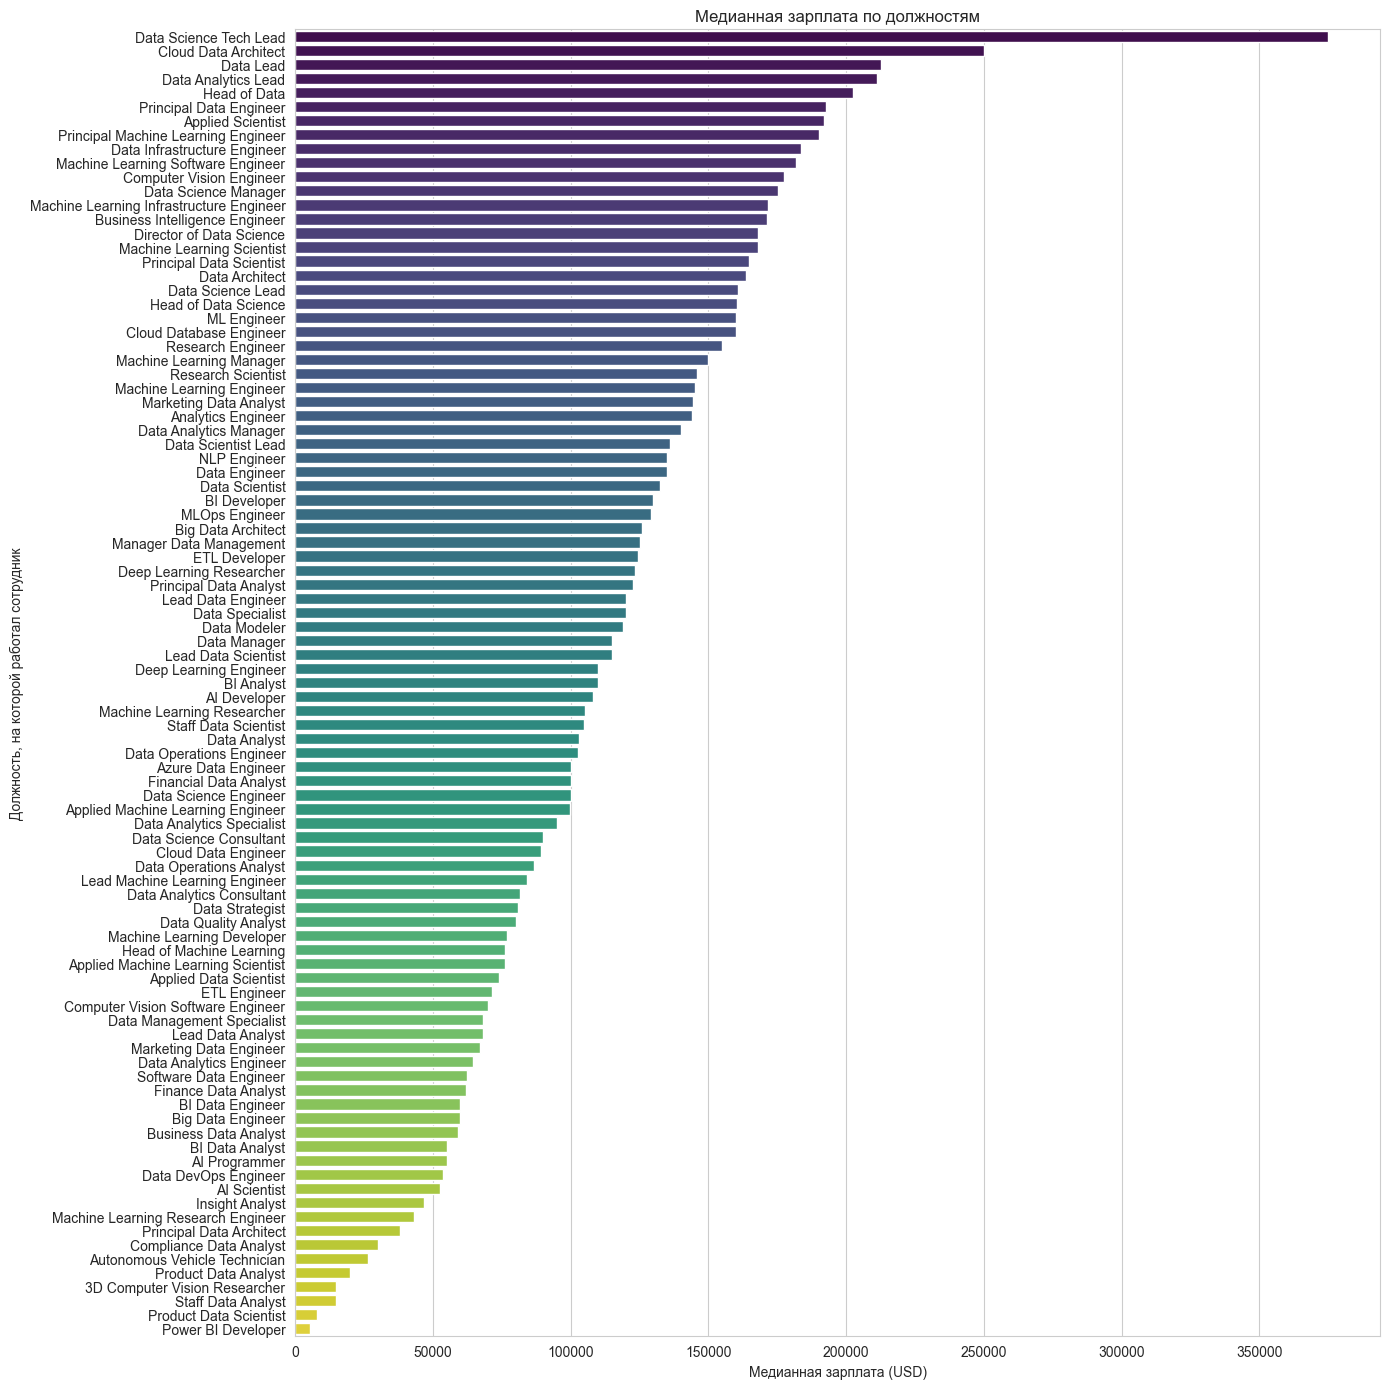

In [23]:
# Подсчет медианной зарплаты
median_salary = df.groupby("job_title")["salary_in_usd"].median().reset_index()
median_salary.columns = ["job_title", "median_salary"]

# Визуализация
plt.figure(figsize=(14, 14))

# График средней зарплаты по странам
sns.barplot(
    x="median_salary",
    y="job_title",
    data=median_salary.sort_values("median_salary", ascending=False),
    palette="viridis",
)
plt.title("Медианная зарплата по должностям")
plt.xlabel("Медианная зарплата (USD)")
plt.ylabel("Должность, на которой работал сотрудник")

plt.tight_layout()
plt.show()

### Выводы:

In [24]:
temp_median_salary = median_salary.sort_values(
    "median_salary", ascending=False
).reset_index()

print("Медианная заработная плата выше в профессиях:")
temp_median_salary.head(10)

Медианная заработная плата выше в профессиях:


,index,job_title,median_salary
0,46,Data Science Tech Lead,375000.0
1,19,Cloud Data Architect,250000.0
2,35,Data Lead,212500.0
3,28,Data Analytics Lead,211254.5
4,58,Head of Data,202500.0
5,83,Principal Data Engineer,192500.0
6,8,Applied Scientist,192000.0
7,85,Principal Machine Learning Engineer,190000.0
8,34,Data Infrastructure Engineer,183655.0
9,75,Machine Learning Software Engineer,181800.0


### f. Оцените, как сильно изменились зарплаты в 2023 году, относительно 2020. Какие должности стали более оплачиваемы, а какие нет?

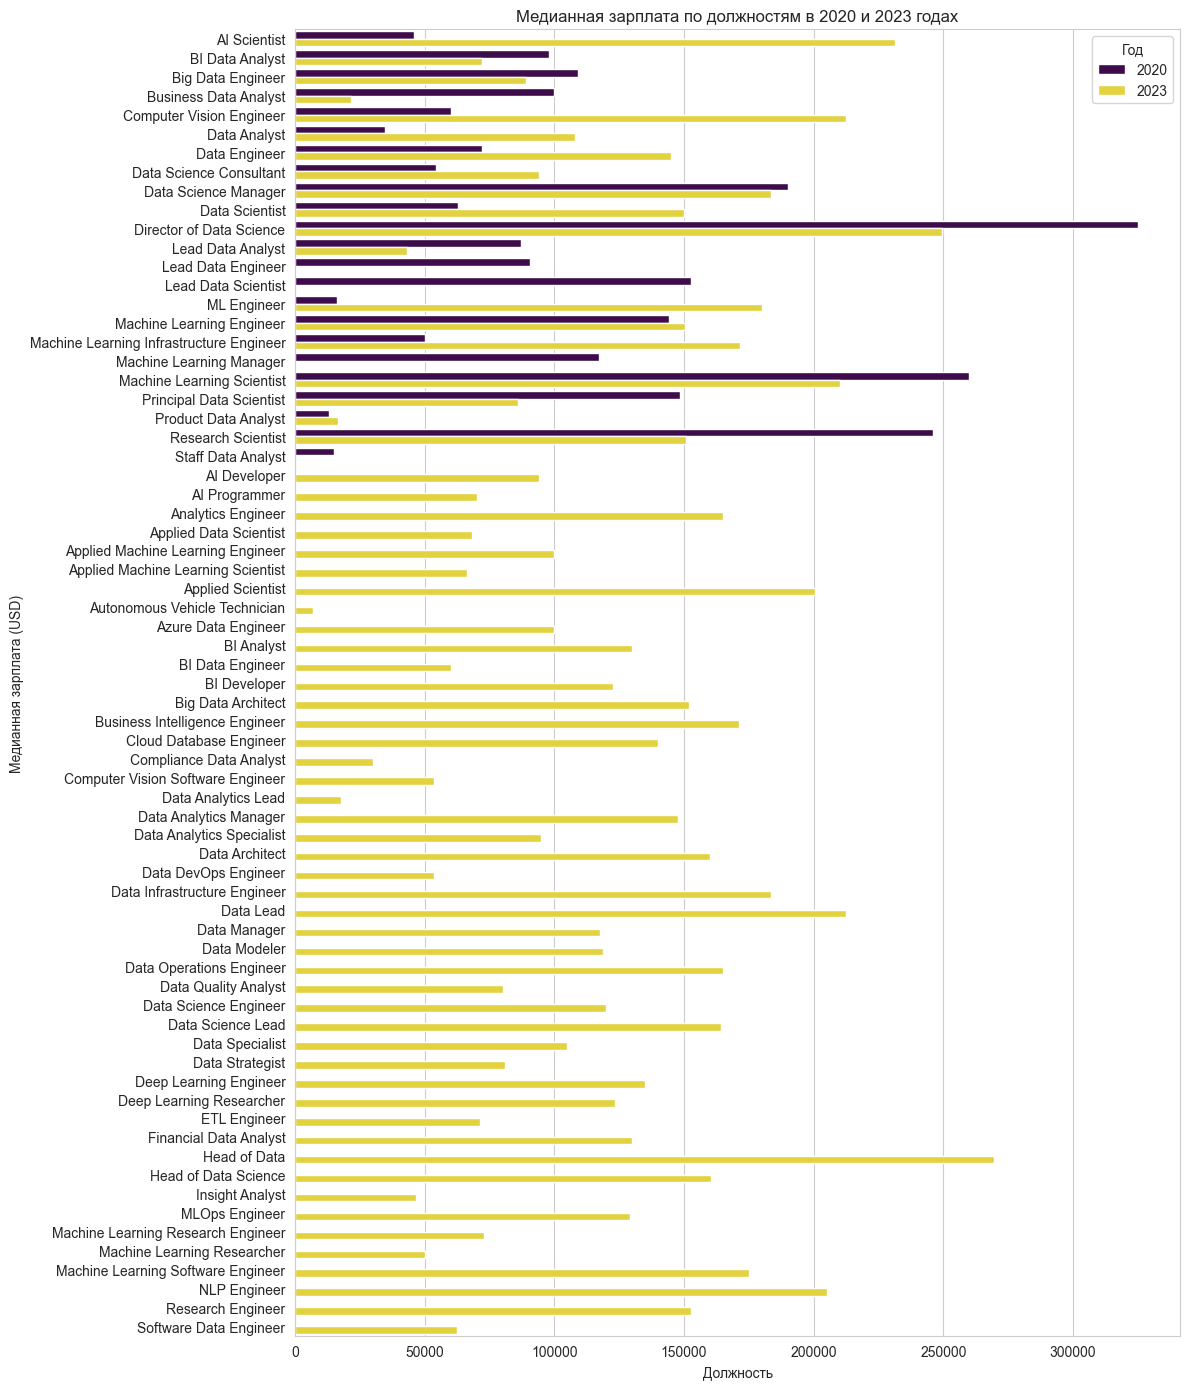

In [25]:
# Фильтрация данных для 2020 и 2023 годов
filtered_data = df[df["work_year"].isin([2020, 2023])]

# Группировка и расчет медианных зарплат
median_salaries = (
    filtered_data.groupby(["work_year", "job_title"])["salary_in_usd"]
    .median()
    .reset_index()
)

# Визуализация медианных зарплат
plt.figure(figsize=(12, 14))
sns.barplot(
    x="salary_in_usd",
    y="job_title",
    hue="work_year",
    data=median_salaries,
    palette="viridis",
)
plt.title("Медианная зарплата по должностям в 2020 и 2023 годах")
plt.xlabel("Должность")
plt.ylabel("Медианная зарплата (USD)")
plt.legend(title="Год")
plt.tight_layout()
plt.show()


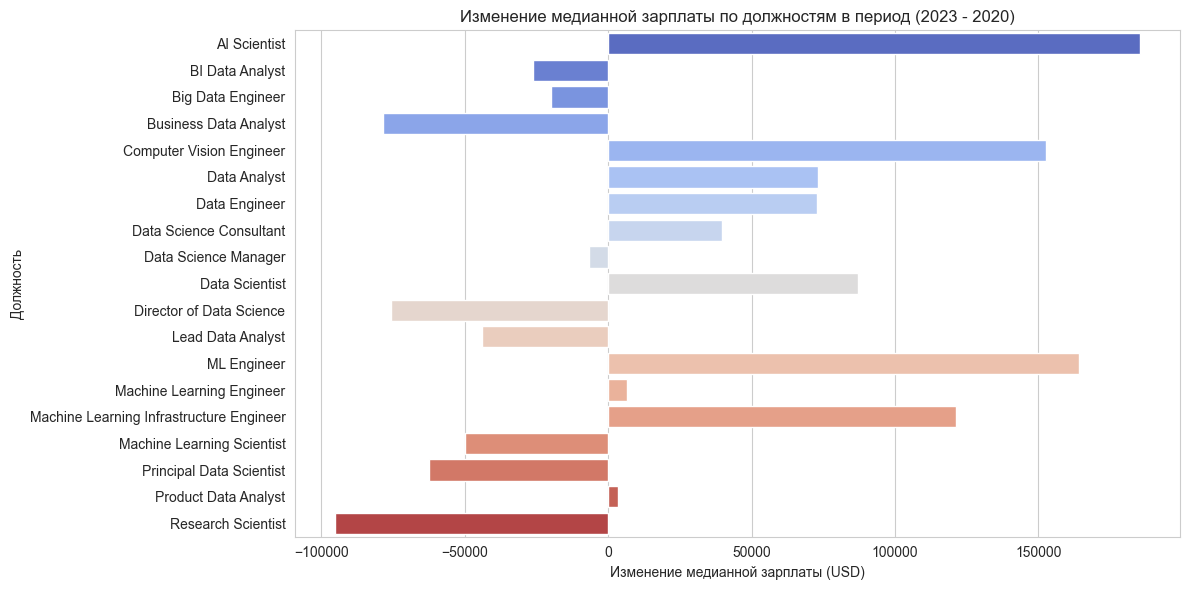

In [26]:
# Сравнение медианных зарплат
salary_change = median_salaries.pivot(
    index="job_title", columns="work_year", values="salary_in_usd"
)
salary_change["change"] = salary_change[2023] - salary_change[2020]

# Удаление строк с NaN значениями
salary_change = salary_change.dropna()

# Визуализация изменений зарплат
plt.figure(figsize=(12, 6))
sns.barplot(x="change", y=salary_change.index, palette="coolwarm", data=salary_change)
plt.title("Изменение медианной зарплаты по должностям в период (2023 - 2020)")
plt.xlabel("Изменение медианной зарплаты (USD)")
plt.ylabel("Должность")
plt.tight_layout()
plt.show()

### Выводы:
В период 2020 - 2023 годы наблюдается следующие тенденции.
Значительный рост зарплат в должностях:
- AI Scientist
- Computer Vision Engineer
- ML Engineer
- Machine Learning Infrastructure Engineer
Средний рост зарплат в должностях:
- Data Analyst
- Data Engineer
- Data Scientist
- Data Science Consultant
Незначительный рост зарплат в должностях:
- Data Science Manager
- Machine Learning Engineer
- Product Data Analyst

Значительное падение зарплат в должностях:
- Business Data Analist
- Resaerch Scientist
- Principal Data Scientist
- Machine Learning Scientist
- Director of Data Scientist
- Lead Data Analist
Незначительный падение зарплат в должностях:
- Bi Data Analist
- Bi Data Engineer

In [27]:
# Фильтрация данных для 2020 года
data_2020 = df[df["work_year"] == 2020]

# Фильтрация данных для 2023 года
data_2023 = df[df["work_year"] == 2023]

# Получение уникальных должностей для каждого года
job_titles_2020 = set(data_2020["job_title"])
job_titles_2023 = set(data_2023["job_title"])

# Вычисление должностей, которые были только в 2020
only_in_2020 = job_titles_2020 - job_titles_2023

only_in_2020_df = pd.DataFrame(only_in_2020, columns=["job_title"])

print("В 2023 году пропали должности:")
only_in_2020_df


В 2023 году пропали должности:


,job_title
0,Lead Data Engineer
1,Machine Learning Manager
2,Lead Data Scientist
3,Staff Data Analyst


In [28]:
# Вычисление должностей, которые появились в 2023
only_in_2023 = job_titles_2023 - job_titles_2020

only_in_2023_df = pd.DataFrame(only_in_2023, columns=["job_title"])

print("В 2023 году появились должности:")
only_in_2023_df

В 2023 году появились должности:


,job_title
0,Deep Learning Researcher
1,BI Analyst
2,Data DevOps Engineer
3,Big Data Architect
4,Head of Data Science
5,Machine Learning Software Engineer
6,Insight Analyst
7,Data Operations Engineer
8,Data Quality Analyst
9,Data Architect


### g. Выявите портрет самого успешного и богатого работника: кем он должен работать, где проживать, удаленная ли работа.

In [29]:
# Ищем самую высокую среднюю зарплату в 2023
most_salary_job_2023 = (
    df[df.work_year == 2023].groupby(["job_title"])["salary_in_usd"].mean().sort_values(ascending=False)
).index[0]

# Фильтрация данных для получения работников с самой высокой зарплатой на этой должности
best_workers = df[(df.work_year == 2023) & (df.job_title == most_salary_job_2023)]



### Вывод:

In [30]:
# Поиск нужной строки
best_worker = best_workers.loc[best_workers['salary_in_usd'].idxmax()]

print("Портрет самого успешного и богатого работника в 2023 году:")
print(f"Должность: {best_worker['job_title']}")
print(f"Страна проживания: {best_worker['employee_residence']}")
print(f"Удаленная работа: {'Нет' if best_worker['remote_ratio'] == 0 else 'Да'}")
print(f"Размер компании: {best_worker['company_size']}")


Портрет самого успешного и богатого работника в 2023 году:
Должность: Director of Data Science
Страна проживания: US
Удаленная работа: Нет
Размер компании: M


### h. Много ли людей работают и проживают в разных регионах? Где больше всего людей проживает и много ли из них (в процентном соотношении) работают удаленно на другую страну?

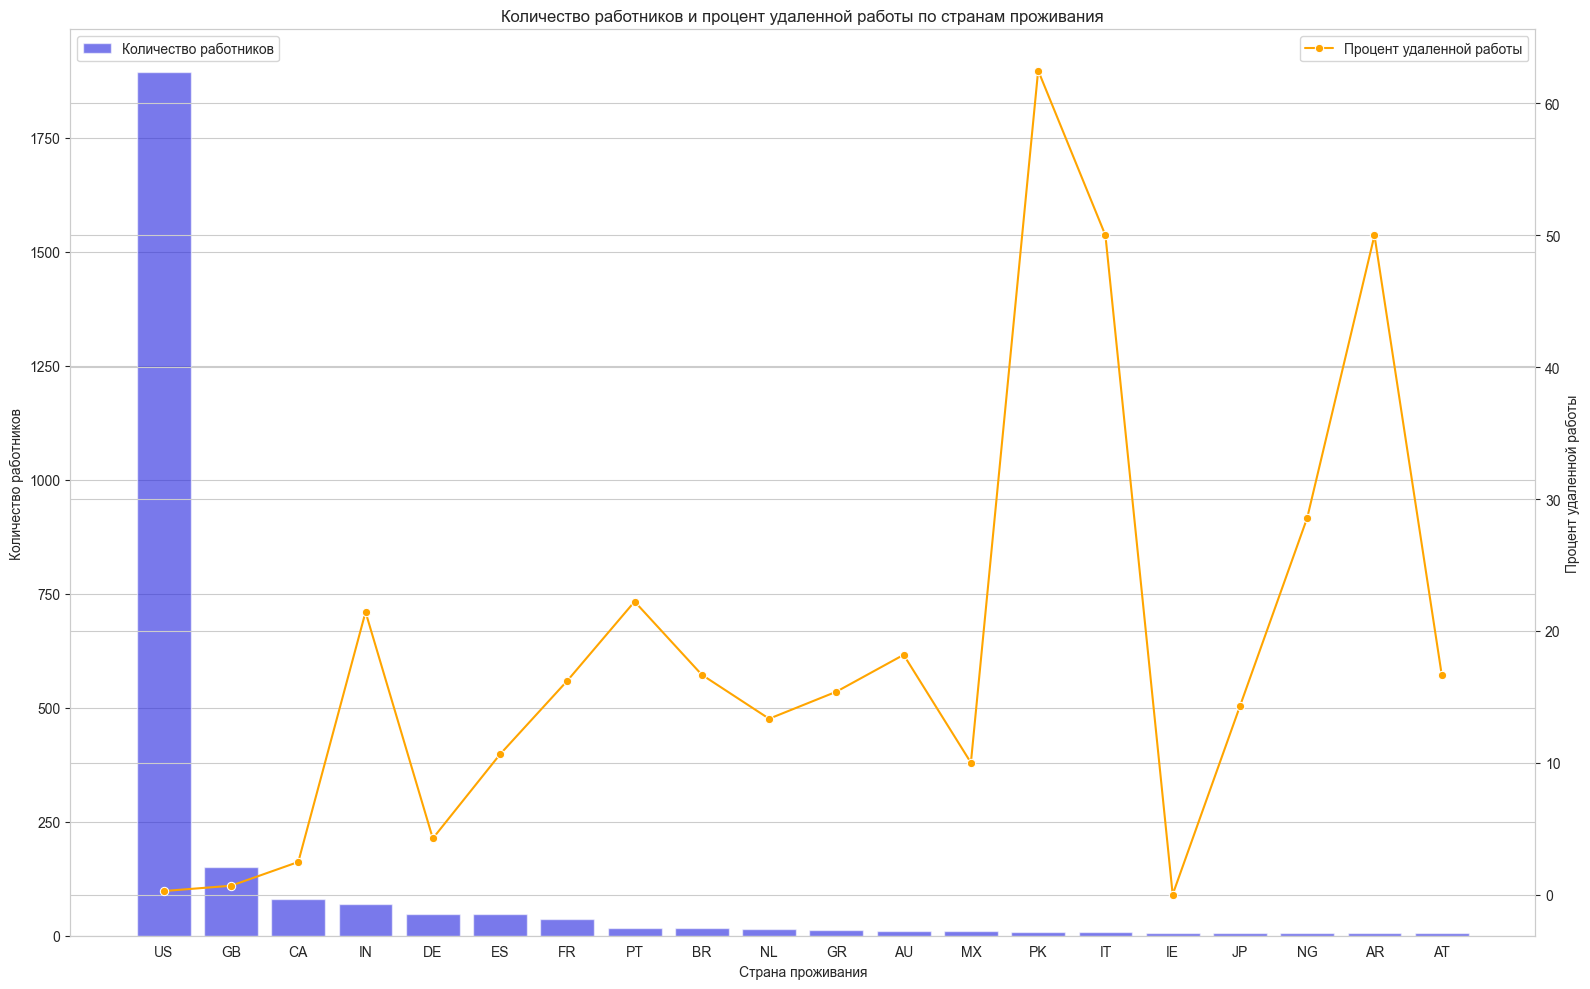

In [31]:
# Группировка по стране проживания. Первые 20
region_df = df["employee_residence"].value_counts().reset_index()[:20]
region_df.columns = ["employee_residence", "count"]

# Сколько из них работает на компанию в другой стране
df["work_to_different_country"] = df["employee_residence"] != df["company_location"]
remote_percent = (
    df.groupby("employee_residence")["work_to_different_country"].mean() * 100
)

# Объединение данных
result_df = pd.merge(
    region_df, remote_percent.reset_index(), on="employee_residence"
).sort_values(by="count", ascending=False)
result_df.columns = ["employee_residence", "count", "remote_percent"]


# Визуализация
plt.figure(figsize=(16, 10))

# Столбчатая диаграмма для количества работников
sns.barplot(
    data=result_df,
    x="employee_residence",
    y="count",
    color="blue",
    label="Количество работников",
    alpha=0.6,
)

plt.title("Количество работников и процент удаленной работы по странам проживания")
plt.legend(loc="upper left")
plt.xlabel("Страна проживания")
plt.ylabel("Количество работников")


# Вторая ось для процента удаленной работы
ax2 = plt.twinx()
sns.lineplot(
    data=result_df,
    x="employee_residence",
    y="remote_percent",
    color="orange",
    marker="o",
    label="Процент удаленной работы",
)
ax2.set_ylabel("Процент удаленной работы (%)")
plt.legend(loc="upper right")
plt.ylabel("Процент удаленной работы")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Влияние места проживания работника на удаленную работу')

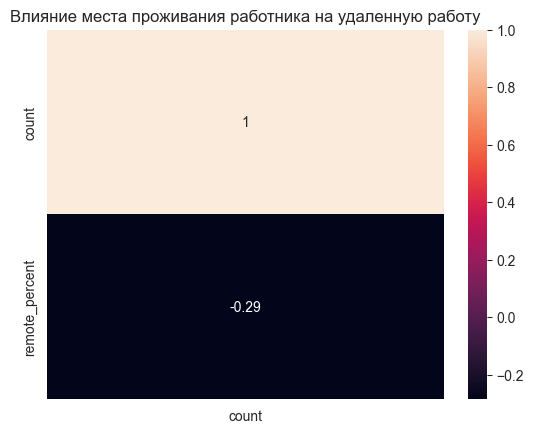

In [32]:
# Тепловая карта
sns.heatmap(result_df[["count", "remote_percent"]].corr()[["count"]], annot=True)
plt.title("Влияние места проживания работника на удаленную работу")

In [33]:
print('Чиловые данные')
print(result_df)

Чиловые данные
   employee_residence  count  remote_percent
0                  US   1893        0.264131
1                  GB    150        0.666667
2                  CA     81        2.469136
3                  IN     70       21.428571
4                  DE     47        4.255319
5                  ES     47       10.638298
6                  FR     37       16.216216
7                  PT     18       22.222222
8                  BR     18       16.666667
9                  NL     15       13.333333
10                 GR     13       15.384615
11                 AU     11       18.181818
12                 MX     10       10.000000
13                 PK      8       62.500000
14                 IT      8       50.000000
15                 IE      7        0.000000
16                 JP      7       14.285714
17                 NG      7       28.571429
18                 AR      6       50.000000
19                 AT      6       16.666667


### Выводы:

Страна с наибольшим количеством работников - US
Страна с наибольшем процентом работников, работающих удаленно - PK

Анализ графика и небольшая цифра корреляции говорит что связь между числом работников в стране и процентом удаленной работы есть, не очень сильная. То есть, хотя и есть некоторая взаимосвязь, она не является строгой. На величину удаленной работы могут влиять множество факторов, но чем больше в стране проживает работников, тем меньшее их количество работает удаленно 